# **Loading data**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime,timedelta

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
temp = pd.read_csv('/content/drive/MyDrive/5/temperature.csv', parse_dates=['datetime'])

In [4]:
temp = temp.set_index('datetime')
print('Dataset shape: {}'.format(temp.shape))


Dataset shape: (45253, 36)


In [5]:
temp

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,289.290000,289.740000,288.270000,289.980000,286.870000,286.180000,284.010000,287.410000,283.850000,294.030000,284.030000,298.170000,288.650000,299.720000,281.000000,286.260000,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,289.303649,289.762974,288.297576,289.997635,286.893636,286.185246,284.054691,287.421360,283.889394,294.035341,284.069789,298.205230,288.650172,299.732518,281.024767,286.262541,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,289.338497,289.830767,288.334343,290.038151,286.951401,286.199194,284.177412,287.454637,283.941919,294.049702,284.173965,298.299595,288.650582,299.766579,281.088319,286.269518,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,289.373345,289.898560,288.371111,290.078666,287.009166,286.213142,284.300133,287.487914,283.994444,294.064063,284.278140,298.393961,288.650991,299.800641,281.151870,286.276496,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,289.560000,294.700000,290.480000,295.150000,285.330000,279.790000,285.410000,281.340000,292.890000,285.980000,290.040000,281.250000,296.920000,294.150000,NaN,285.300000,278.740000,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,290.700000,295.820000,291.020000,295.820000,285.160000,280.220000,286.010000,281.690000,292.400000,286.170000,291.420000,281.050000,296.920000,293.900000,NaN,285.330000,278.750000,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,289.710000,296.040000,291.150000,296.370000,285.160000,279.920000,286.040000,281.070000,291.650000,284.210000,291.840000,280.170000,296.330000,292.060000,NaN,282.910000,277.550000,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_std = temp.std(axis=0)
max_std = all_std.max()
city_max_std = temp.columns[all_std==max_std][0]

print('City with highest temperature variation: {} ({} degrees)'.format(city_max_std,round(max_std,2)))

City with highest temperature variation: Minneapolis (12.77 degrees)


In [7]:
data = temp[['Vancouver', 'Minneapolis']]
data.describe()

,Vancouver,Minneapolis
count,44458.000000,45240.000000
mean,283.862654,280.700489
std,6.640131,12.774979
min,245.150000,242.336667
25%,279.160000,271.790000
50%,283.450000,281.639000
75%,288.600785,291.310000
max,307.000000,308.240000


In [8]:
data = data - 273.15
data.describe()

,Vancouver,Minneapolis
count,44458.000000,45240.000000
mean,10.712654,7.550489
std,6.640131,12.774979
min,-28.000000,-30.813333
25%,6.010000,-1.360000
50%,10.300000,8.489000
75%,15.450785,18.160000
max,33.850000,35.090000


# **Visualizing the data**

Text(0, 0.5, 'Temperature')

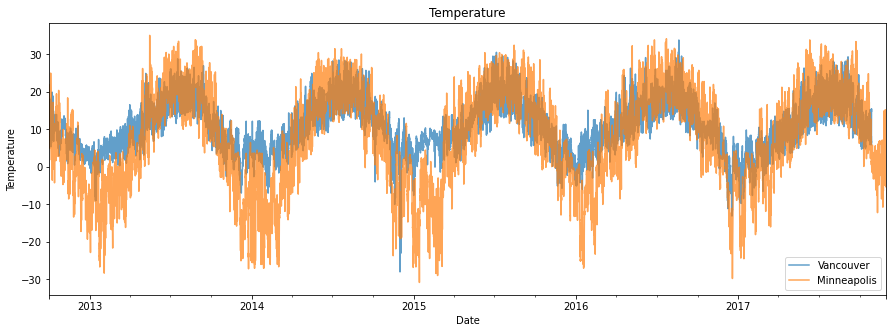

In [9]:
data.plot(
    figsize=(15,5),
    subplots=False,
    title='Temperature',
    alpha=0.7
)
plt.xlabel('Date')
plt.ylabel('Temperature')

# **Cleaning the data**

In [10]:
Van_non_missing = data['Vancouver'].dropna()
max_date = Van_non_missing.index.max()
data = data[data.index <= max_date]

In [11]:
print(data.isna().sum())

Vancouver       3
Minneapolis    13
dtype: int64


In [12]:
data_mean = data.resample('D').mean()
data_min = data.resample('D').min()
data_max = data.resample('D').max()
print('Resample shape: {}'.format(data_mean.shape))
data_mean.describe()

Resample shape: (1854, 2)


,Vancouver,Minneapolis
count,1854.000000,1854.000000
mean,10.714837,7.667746
std,6.186519,12.385574
min,-7.445567,-24.687187
25%,6.183644,-1.058090
50%,10.457650,9.011625
75%,15.954583,18.690818
max,25.958333,30.538125


In [13]:
print(data_mean.isna().sum())

Vancouver      0
Minneapolis    0
dtype: int64


In [14]:
data_mean

,Vancouver,Minneapolis
datetime,,
2012-10-01,11.470769,13.977799
2012-10-02,12.995190,16.197277
2012-10-03,12.378125,13.492083
2012-10-04,11.223333,15.245833
2012-10-05,10.607292,12.036875
...,...,...
2017-10-24,10.685417,7.474583
2017-10-25,9.988333,7.221250
2017-10-26,10.258333,8.682500


Text(0, 0.5, 'Temperature')

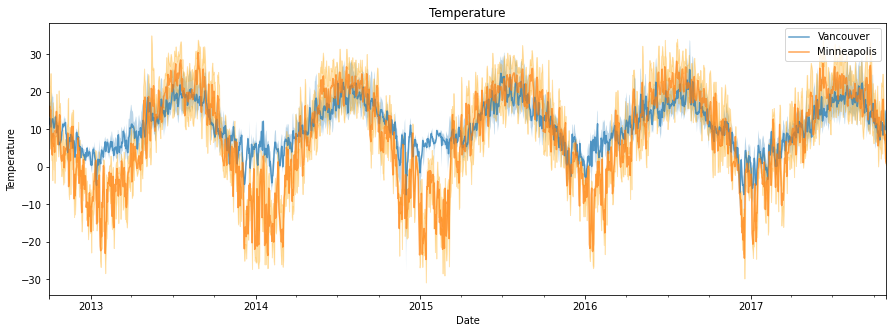

In [15]:
data_mean.plot(
    figsize=(15,5),
    subplots=False,
    title='Temperature',
    alpha=0.7
)
plt.fill_between(
    x=data_mean.index,
    y1=data_min['Vancouver'].values,
    y2=data_max['Vancouver'].values,
    alpha=0.3
)
plt.fill_between(
    x=data_mean.index,
    y1=data_min['Minneapolis'].values,
    y2=data_max['Minneapolis'].values,
    color='orange',
    alpha=0.3
)
plt.xlabel('Date')
plt.ylabel('Temperature')

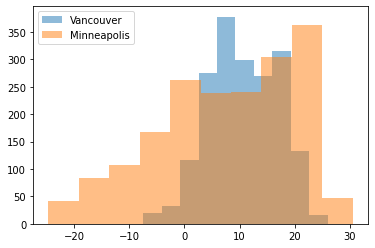

In [16]:
##Outliers
plt.hist(data_mean['Vancouver'], alpha=0.5, label='Vancouver')
plt.hist(data_mean['Minneapolis'], alpha=0.5, label='Minneapolis')
plt.legend()

Augmented Dickey-Fuller test

In [17]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_mean['Vancouver'])
print('Vancouver')
print('--------------------------')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

print('\n\n')
    
result = adfuller(data_mean['Minneapolis'])
print('Minneapolis')
print('--------------------------')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))  

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Vancouver
--------------------------
ADF Statistic: -2.512047
p-value: 0.112571
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568



Minneapolis
--------------------------
ADF Statistic: -2.589836
p-value: 0.095116
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Autocorrelation

Vancouver


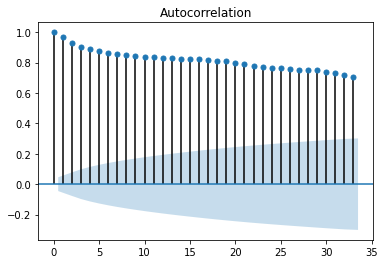

Minneapolis


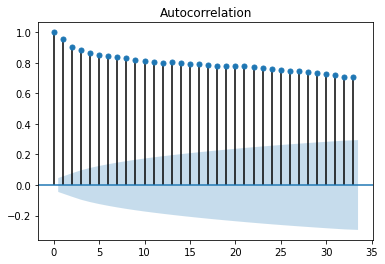

In [18]:
import statsmodels.api as sm
print('Vancouver')
_=sm.graphics.tsa.plot_acf(data_mean['Vancouver'])
plt.show()
print('Minneapolis')
_=sm.graphics.tsa.plot_acf(data_mean['Minneapolis'])
plt.show()

Vancouver


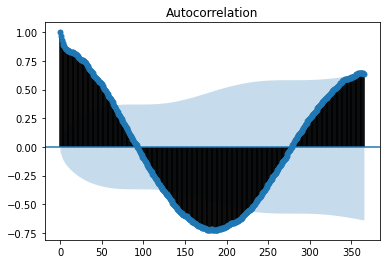

Minneapolis


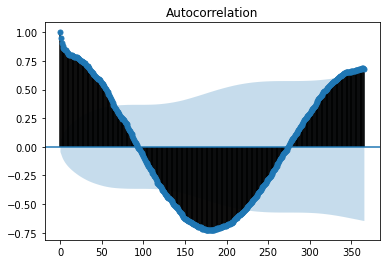

In [19]:
import statsmodels.api as sm
print('Vancouver')
_=sm.graphics.tsa.plot_acf(data_mean['Vancouver'], lags=365)
plt.show()
print('Minneapolis')
_=sm.graphics.tsa.plot_acf(data_mean['Minneapolis'], lags=365)
plt.show()

Vancouver


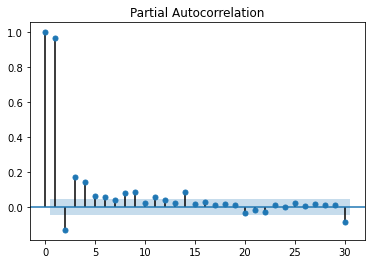

Minneapolis


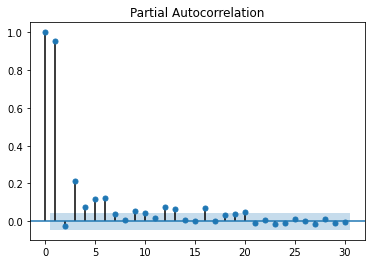

In [20]:
print('Vancouver')
_=sm.graphics.tsa.plot_pacf(data_mean['Vancouver'], lags=30)
plt.show()
print('Minneapolis')
_=sm.graphics.tsa.plot_pacf(data_mean['Minneapolis'], lags=30)
plt.show()

Trend

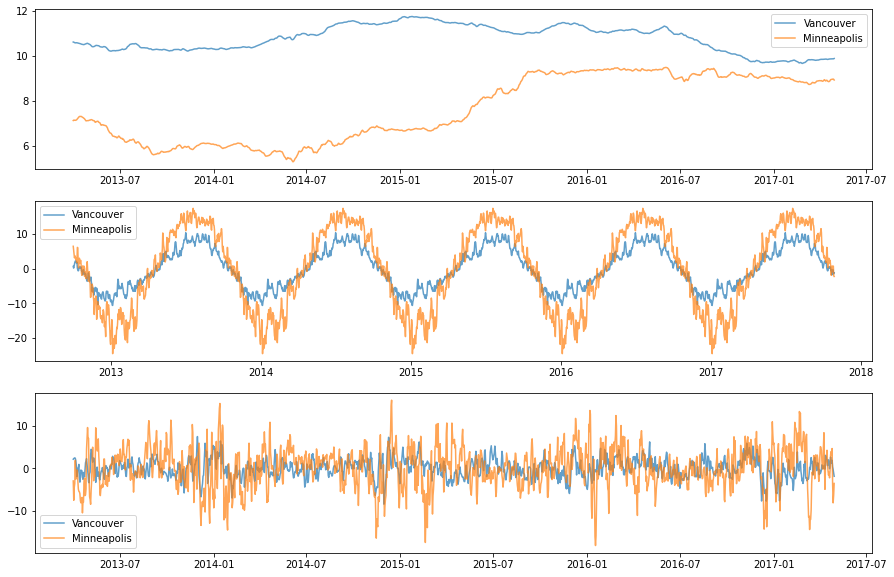

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd
sd_SF = sd(data_mean['Vancouver'], freq=365)
sd_M = sd(data_mean['Minneapolis'], freq=365)

plt.figure(figsize=(15,10))
ax1=plt.subplot(311)
ax1.plot(sd_SF.trend, label='Vancouver', alpha=0.7)
ax1.plot(sd_M.trend, label='Minneapolis', alpha=0.7)
plt.legend()
ax2=plt.subplot(312)
ax2.plot(sd_SF.seasonal, label='Vancouver', alpha=0.7)
ax2.plot(sd_M.seasonal, label='Minneapolis', alpha=0.7)
plt.legend()
ax3=plt.subplot(313)
ax3.plot(sd_SF.resid, label='Vancouver', alpha=0.7)
ax3.plot(sd_M.resid, label='Minneapolis', alpha=0.7)
plt.legend()

In [22]:
data_mean = data_mean.reset_index()
data_mean

,datetime,Vancouver,Minneapolis
0,2012-10-01,11.470769,13.977799
1,2012-10-02,12.995190,16.197277
2,2012-10-03,12.378125,13.492083
3,2012-10-04,11.223333,15.245833
4,2012-10-05,10.607292,12.036875
...,...,...,...
1849,2017-10-24,10.685417,7.474583
1850,2017-10-25,9.988333,7.221250
1851,2017-10-26,10.258333,8.682500
1852,2017-10-27,9.935417,1.450000


In [23]:
vancouver = data_mean.loc[:, ['datetime', 'Vancouver']]
vancouver

,datetime,Vancouver
0,2012-10-01,11.470769
1,2012-10-02,12.995190
2,2012-10-03,12.378125
3,2012-10-04,11.223333
4,2012-10-05,10.607292
...,...,...
1849,2017-10-24,10.685417
1850,2017-10-25,9.988333
1851,2017-10-26,10.258333
1852,2017-10-27,9.935417


In [24]:
#select part of data into train test split
vancouversample=vancouver[vancouver['datetime']>='2013-01-01']
vancouversample=vancouversample.iloc[0:30*12*2]

vancouversample['datetime']=pd.to_datetime(vancouversample['datetime'])
vancouversample.columns=['time','temp']
vancouversample

,time,temp
92,2013-01-01,1.148750
93,2013-01-02,0.471667
94,2013-01-03,1.347708
95,2013-01-04,0.503750
96,2013-01-05,2.811146
...,...,...
807,2014-12-17,5.889492
808,2014-12-18,5.576393
809,2014-12-19,7.280117
810,2014-12-20,7.014382


In [30]:
train=vancouversample[0:547]
test=vancouversample[547:]

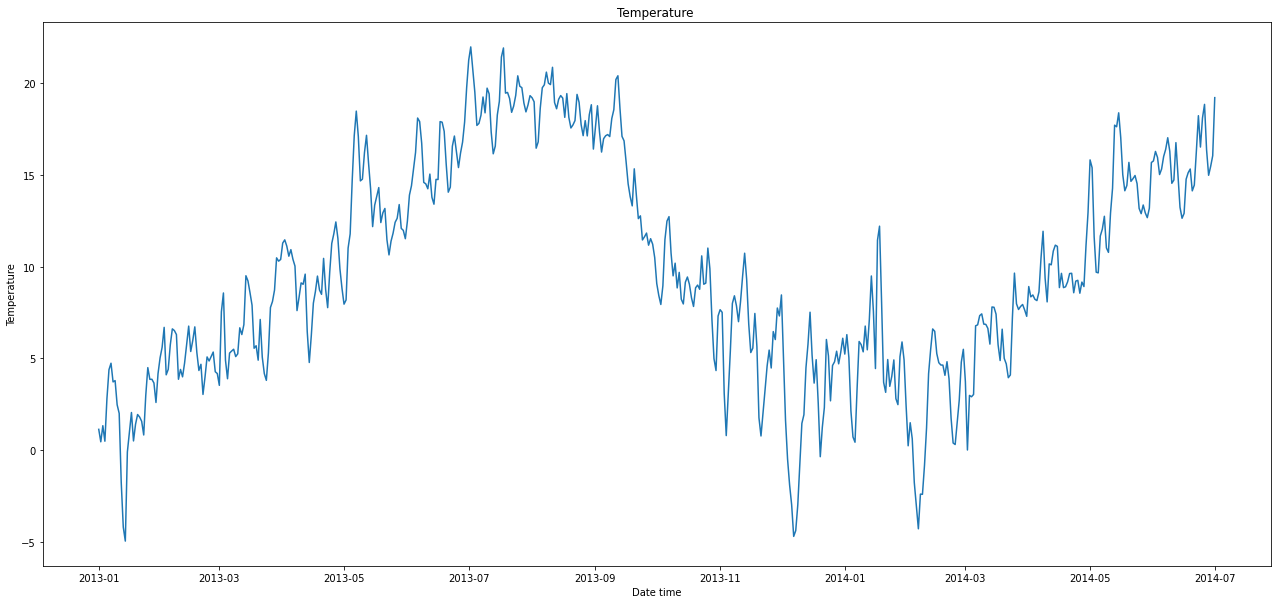

In [31]:
plt.figure(figsize=(22,10))
plt.plot(train.time,train.temp)
plt.title("Temperature ")
plt.xlabel("Date time")
plt.ylabel("Temperature")
plt.show()

In [32]:
ts=train
ts.index=ts.time
ts.drop('time',inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
# ARIMA LİBRARY
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(4,0,4)) 
model_fit = model.fit(disp=0)

print (model_fit.summary())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                   temp   No. Observations:                  547
Model:                     ARMA(4, 4)   Log Likelihood                -946.892
Method:                       css-mle   S.D. of innovations              1.362
Date:                Mon, 24 Jan 2022   AIC                           1913.784
Time:                        23:22:56   BIC                           1956.828
Sample:                    01-01-2013   HQIC                          1930.609
                         - 07-01-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6898      4.012      2.415      0.016       1.826      17.554
ar.L1.temp     0.8063      0.273      2.950      0.003       0.271       1.342
ar.L2.temp    -0.0728      0.315     -0.231      0.8

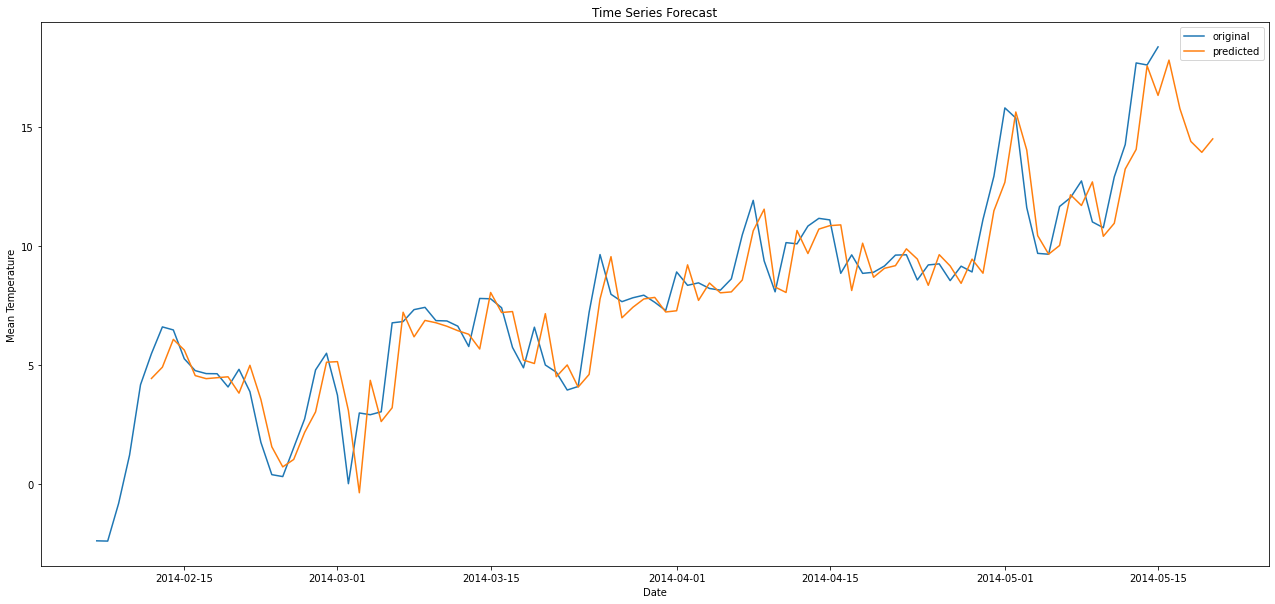

In [35]:
# predict
start_index = datetime(2014, 2, 12)
end_index = datetime(2014, 5, 20)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(vancouversample.time[402:500],vancouversample.temp[402:500],label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()